In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import os

In [24]:
def sig_print(signal,Nseg,FullHeight,HILO,GAIN,name):
    
    if FullHeight < 18:
        FullHeight = 18
    Wseg = int(len(signal)/Nseg)
    signal_clean = signal - np.mean(signal[-1000:])
    
    Wseg = int(len(signal_clean)/Nseg)
    Scale = np.max([np.abs(np.min(signal_clean[2*Wseg:])),np.max(signal_clean[2*Wseg:])])
    GAIN = str(GAIN).zfill(4)
    HILO = str(HILO)
    
    MAX = str(int(np.max(signal[2*Wseg:]))).zfill(4)
    MIN = str(int(np.min(signal[2*Wseg:]))).zfill(4)
    MAX2 = str(int(np.max(signal))).zfill(4)
    MIN2 = str(int(np.min(signal))).zfill(4)
    NOISE = str(int(np.std(signal[-1000:]))).zfill(4)
    PEAK = str(int(((np.max(signal[2*Wseg:]) - np.min(signal[2*Wseg:])))/2)).zfill(4)
    
    for k in range(len(signal_clean)):
        signal_clean[k] = signal_clean[k] * FullHeight  / Scale / 2
    signal_clean


    SignalShortMax = []
    SignalShortMin = []
    for k in range(Nseg):
        SignalShortMax.append(int(np.max(signal_clean[k*Wseg:(k+1)*Wseg])))
        SignalShortMin.append(int(np.min(signal_clean[k*Wseg:(k+1)*Wseg])))
    SignalShortMax[0] = 0
    SignalShortMin[0] = 0
    SignalShortMax[1] = 0
    SignalShortMin[1] = 0
    
    img = np.zeros((Nseg, FullHeight), dtype=str)
    i = 0

    for col in img:
        j = 0
        for h in col:
            if (j == FullHeight/2):
                img[i,j] = "."            
            elif (j < SignalShortMax[i]+FullHeight/2) and (j > SignalShortMin[i]+FullHeight/2):
                img[i,j] = "|"
            else:
                img[i,j] = " "
            j += 1
            #print("Row",j,"Col",i)
        img[i,0] = "-"
        img[i,-1] = "-"
        i += 1
    img[0][:] = "|"
    img[-1][:] = "|"   
    
    i = 0
    for col in img:
        img[i,0] = "="
        img[i,-1] = "="
        i += 1
        
    img[-9][1] = "M"
    img[-8][1] = "A"
    img[-7][1] = "X"
    img[-6][1] = ":"
    img[-5][1] = MAX[0]
    img[-4][1] = MAX[1]
    img[-3][1] = MAX[2]
    img[-2][1] = MAX[3]

    img[-9][2] = "M"
    img[-8][2] = "I"
    img[-7][2] = "N"
    img[-6][2] = ":"
    img[-5][2] = MIN[0]
    img[-4][2] = MIN[1]
    img[-3][2] = MIN[2]
    img[-2][2] = MIN[3]
    
    img[-9][3] = "A"
    img[-8][3] = "M"
    img[-7][3] = "P"
    img[-6][3] = ":"
    img[-5][3] = PEAK[0]
    img[-4][3] = PEAK[1]
    img[-3][3] = PEAK[2]
    img[-2][3] = PEAK[3]
        
    img[-9][5] = "M"
    img[-8][5] = "A"
    img[-7][5] = "X"
    img[-6][5] = ":"
    img[-5][5] = MAX2[0]
    img[-4][5] = MAX2[1]
    img[-3][5] = MAX2[2]
    img[-2][5] = MAX2[3]

    img[-9][6] = "M"
    img[-8][6] = "I"
    img[-7][6] = "N"
    img[-6][6] = ":"
    img[-5][6] = MIN2[0]
    img[-4][6] = MIN2[1]
    img[-3][6] = MIN2[2]
    img[-2][6] = MIN2[3]

    img[-9][8] = "S"
    img[-8][8] = "T"
    img[-7][8] = "D"
    img[-6][8] = ":"
    img[-5][8] = NOISE[0]
    img[-4][8] = NOISE[1]
    img[-3][8] = NOISE[2]
    img[-2][8] = NOISE[3]
    
    img[-10][-2] = "G"
    img[-9][-2] = "A"
    img[-8][-2] = "I"
    img[-7][-2] = "N"
    img[-6][-2] = ":"
    img[-5][-2] = GAIN[0]
    img[-4][-2] = GAIN[1]
    img[-3][-2] = GAIN[2]
    img[-2][-2] = GAIN[3]

    img[-9][-3] = "H"
    img[-8][-3] = "I"
    img[-7][-3] = "L"
    img[-6][-3] = "O"
    img[-5][-3] = ":"
    img[-2][-3] = HILO
    
    for k in img.T:
        print("".join(k))
        
    plt.figure(figsize = (10, 5))
    plt.plot(SignalShortMin)
    plt.plot(SignalShortMax)
    plt.title(name)
    plt.savefig("imgs/"+name+"_minmax.jpg")
    
    plt.figure(figsize = (10, 5))
    plt.plot(signal)
    plt.title(name)
    plt.savefig("imgs/"+name+"_signal.jpg")

./piezo_hilo1_1000DAC.csv 1 1000
|                                                  MAX:2225|
|  | |             |                               MIN:1790|
|     |            |                               AMP:0217|
| |    |           |                                       |
| |     |          |                               MAX:3836|
| |      |         |                               MIN:0000|
|         |        |                                       |
|          |       ||                              STD:0004|
|            |     ||                                      |
|..........................................................|
|                  ||                                      |
|                  ||                                      |
|                  ||                                      |
|                  ||                                      |
|                  |                                       |
|                  |                                

./piezo_hilo1_100DAC.csv 1 100
| |                                                MAX:2051|
| |         |     |                                MIN:2016|
| || ||   |||     |        |  |                    AMP:0017|
| ||||||||||||  |||        |  |         |  |  |            |
| |||||||||||||||||||| | | || |  |||||| || || |    MAX:2145|
| ||||||||||||||||||||||||||||||||||||||||||||||| |MIN:1964|
| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
| |||||||||||||||||||||||||||||||||||||||||||||||||STD:0004|
| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|..........................................................|
| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
| ||||||||| |||| |||||||||||||||||||||||||||||||||||||||||||
|   | |||||  ||    |  || ||||| |||||||||||||||||||||||||||||
|            |     |  || |  || |||     |  |||| |||||||| ||||
|                                      |  | ||  ||      || |
|                                            |        

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo0_1000DAC.csv 0 1000
|   |                                              MAX:2077|
|  |                                               MIN:1961|
| |                |                               AMP:0058|
| |    |           |                                       |
| |     |          |                               MAX:3102|
|                  |                               MIN:0499|
|                  |                                       |
|            |     ||                              STD:0001|
|              ||  ||                                      |
|..........................................................|
|                  ||                                      |
|                  ||                                      |
|                  |                                       |
|                  |                                       |
|                  |                                       |
|                  |                                

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo1_800DAC.csv 1 800
|                                                  MAX:2237|
|                  |                               MIN:1797|
|  |               |                               AMP:0220|
| |    |           |                                       |
| |     |          |                               MAX:3836|
| |      |         |                               MIN:0000|
|         |        |                                       |
|                  |                               STD:0005|
|            |     ||                                      |
|..........................................................|
|                  ||                                      |
|                  ||                                      |
|                  ||                                      |
|                  ||                                      |
|                  |                                       |
|                  |                                  

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo0_200DAC.csv 0 200
| |                                                MAX:2047|
| |                                                MIN:2036|
| |                                                AMP:0005|
| |||       |              |                               |
| |||       |              |                       MAX:2137|
| ||||   || |        ||||  ||  || |  | |   |       MIN:1994|
| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
| |||||||||||||||||||||||||||||||||||||||||||||||||STD:0001|
|  |||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|..........................................................|
|  |||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|  | |||||| ||||||||||||||||||| ||||||||||||||||||||||||||||
|  | |||||| ||||||||||||||||||| ||||||||||||||||||||||||||||
|    || |        |      ||  ||   |     |   ||  ||  ||| ||| |
|                                                          |
|                                                     

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo0_400DAC.csv 0 400
|  |                                               MAX:2060|
|  |||                                             MIN:2019|
| |||||                                            AMP:0020|
| |   ||           |                                       |
| |    ||          |                               MAX:2941|
| |    |||         |                               MIN:1451|
| |      ||        |                                       |
|        ||||      ||                              STD:0001|
|          |||| || ||    |   |   |        |  |             |
|..........................................................|
|                  ||||  |     |  |       |         |      |
|                  ||                                      |
|                  ||                                      |
|                  ||                                      |
|                  |                                       |
|                  |                                  

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo1_200DAC.csv 1 200
| |                                                MAX:2060|
| |                                                MIN:2018|
| || |                                             AMP:0021|
| || |                                                     |
| || |                        |    |     |         MAX:2415|
| || |   ||  |  |     |  |    | |  |   | | |    || MIN:1843|
| |||| ||||||||||||||||||| ||||||||||||||| ||||||||| |||||||
| |||||||||||||||||||||||||||||||||||||||||||||||||STD:0004|
| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|..........................................................|
|   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||
|    | ||||||||   ||||||| |||||| | ||| |||| | | || |||||||||
|    | | ||  ||      |  | |   |  |     | |      |  ||||   ||
|    |                           |                         |
|                                                     

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


./piezo_hilo1_4000DAC.csv 1 4000
| |                                                MAX:2317|
| |                                                MIN:1480|
| |                                                AMP:0418|
|    |                                                     |
|  | |                                             MAX:3588|
|  | |                                             MIN:0000|
|    |                                                     |
|   ||                                             STD:0005|
|   ||                                                     |
|..........................................................|
|    |                                                     |
|    |                                                     |
|    |                                                     |
|    |                                                     |
|    |                                                     |
|    |                                              

/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/kelu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


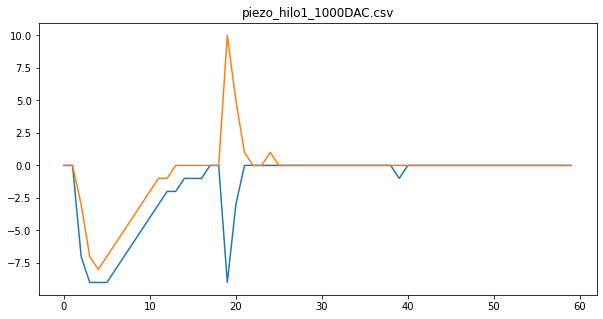

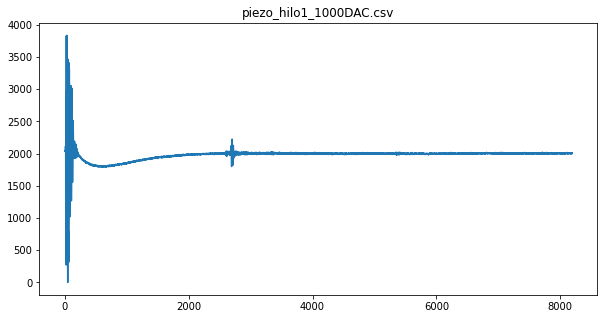

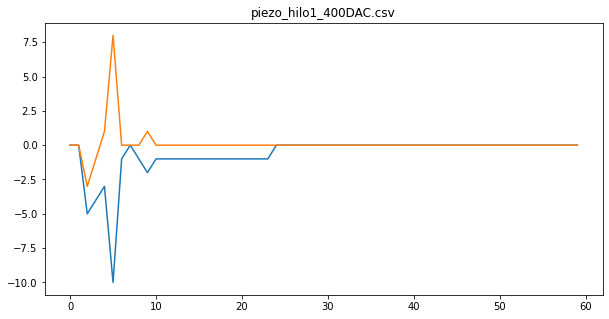

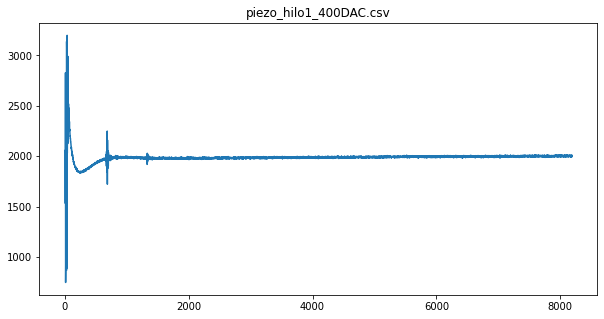

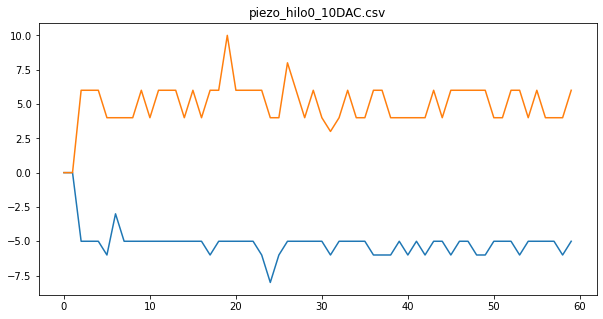

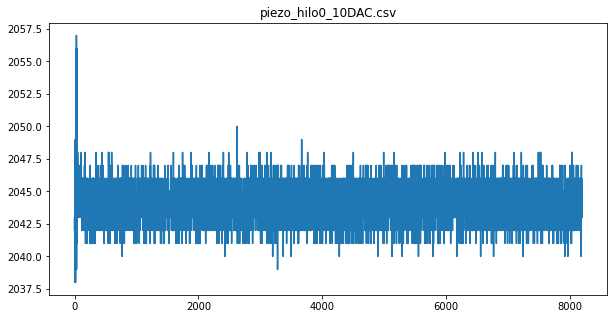

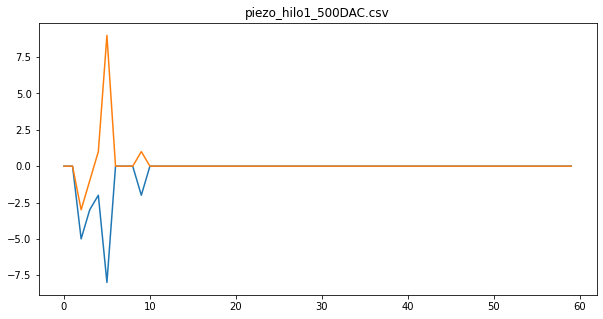

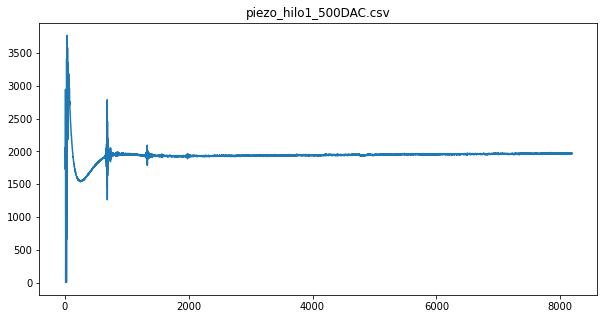

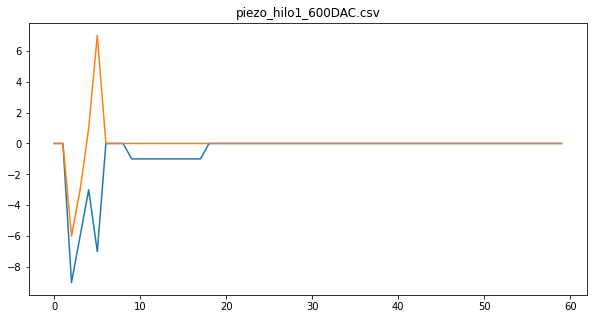

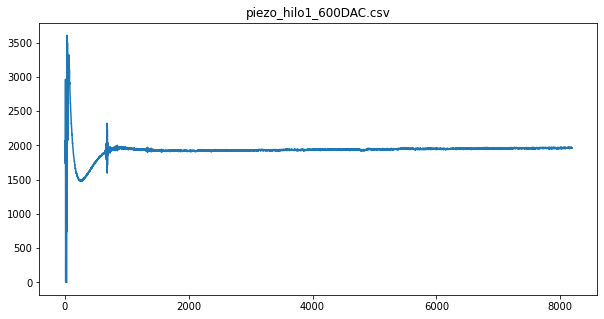

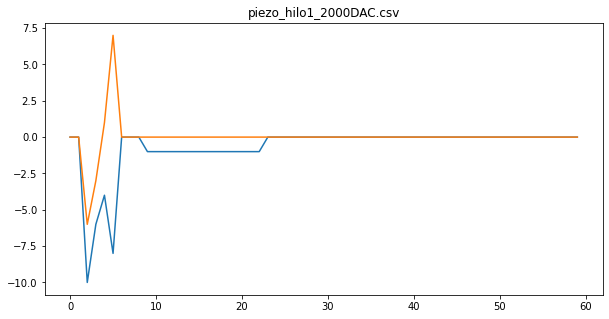

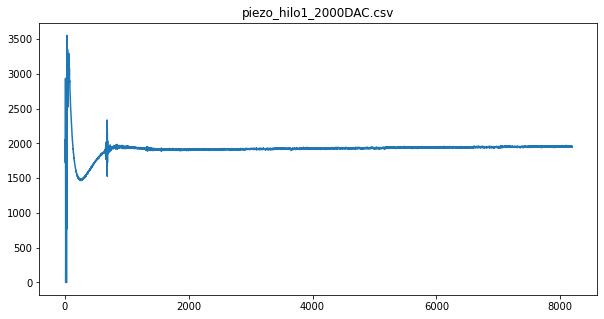

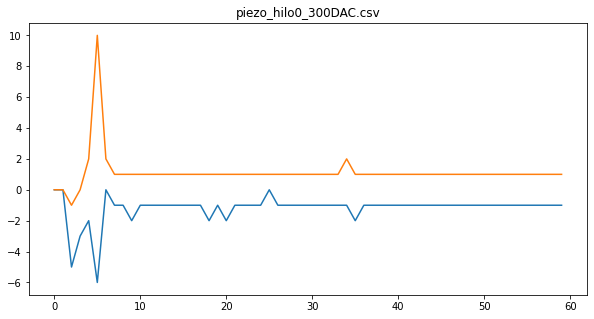

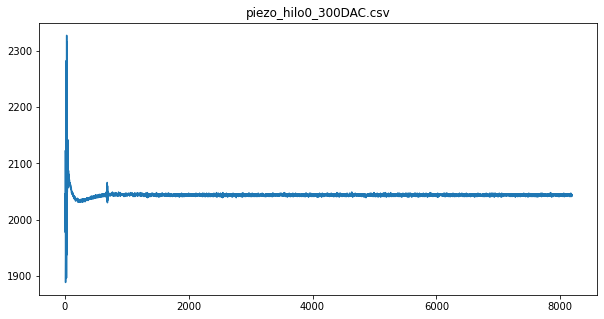

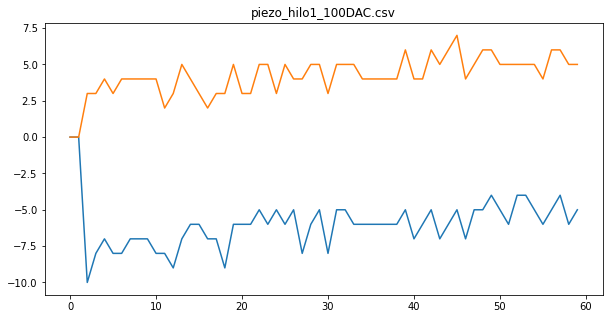

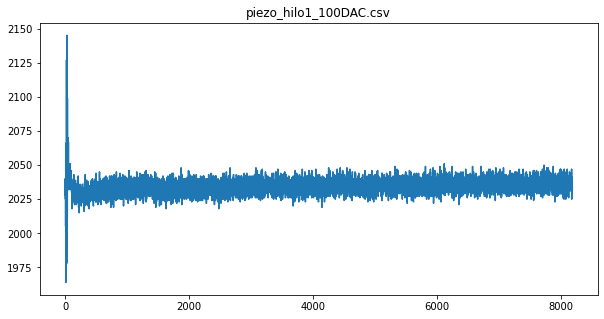

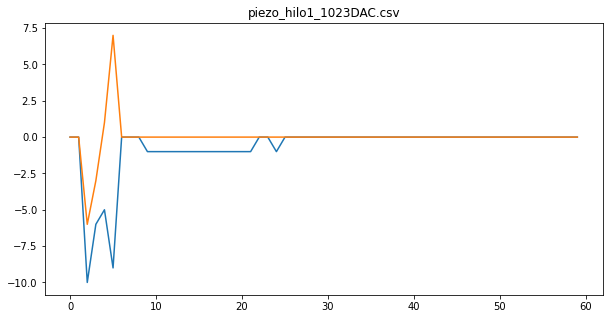

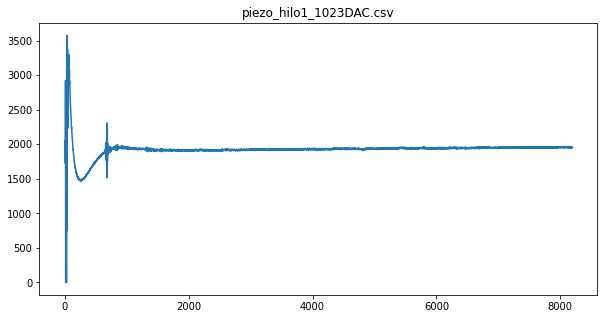

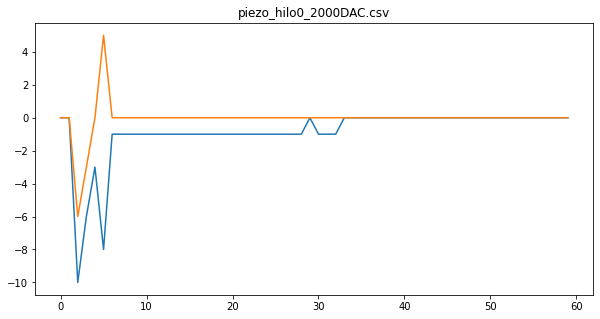

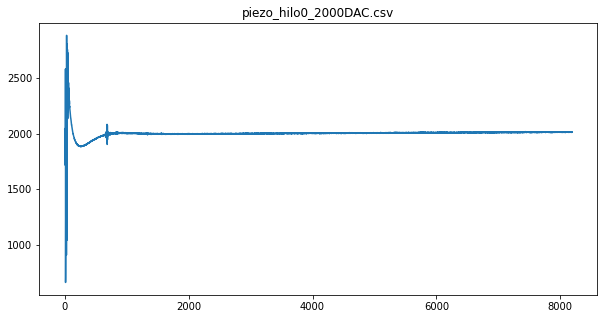

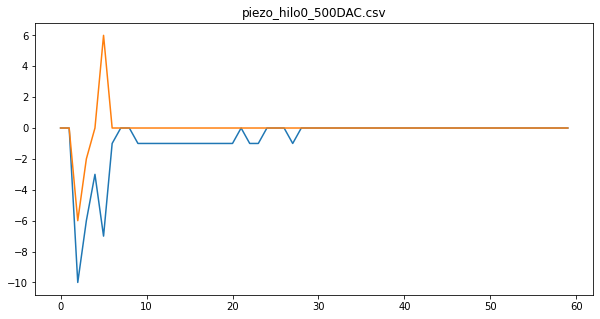

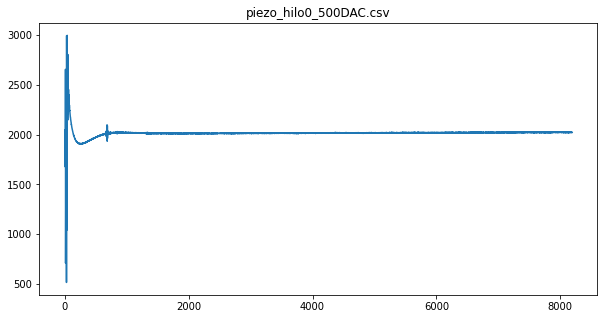

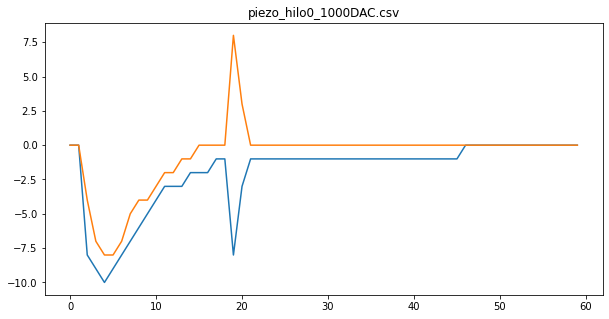

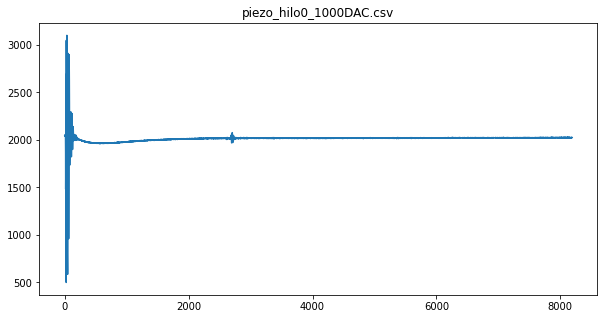

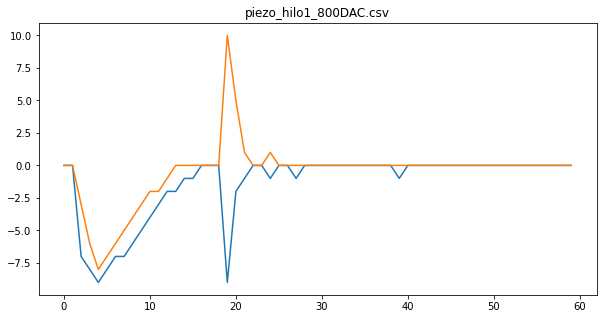

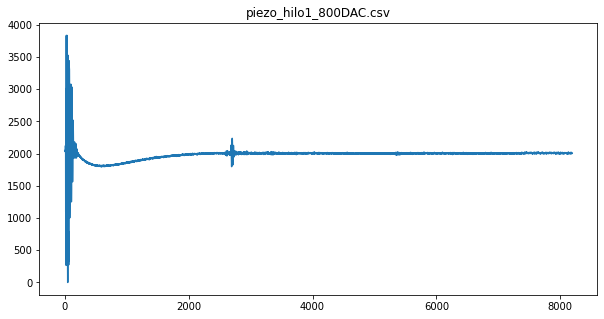

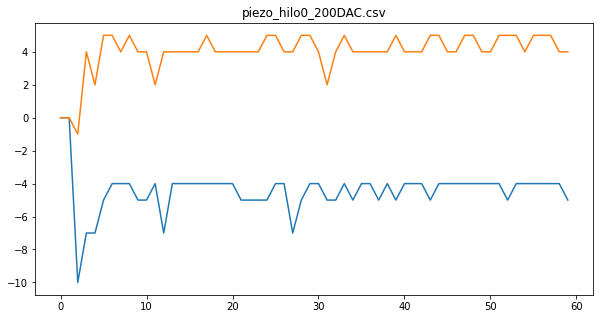

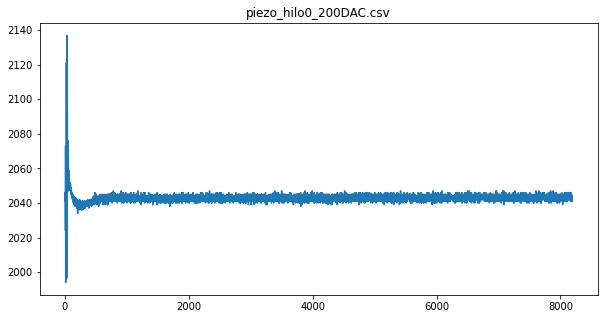

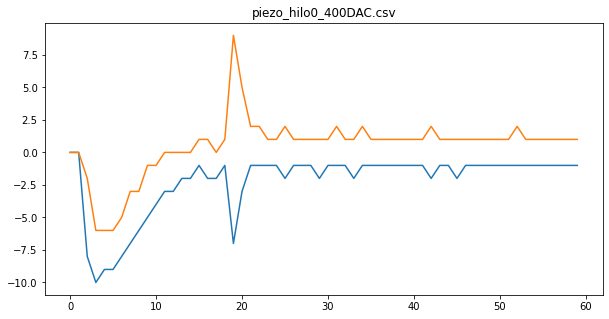

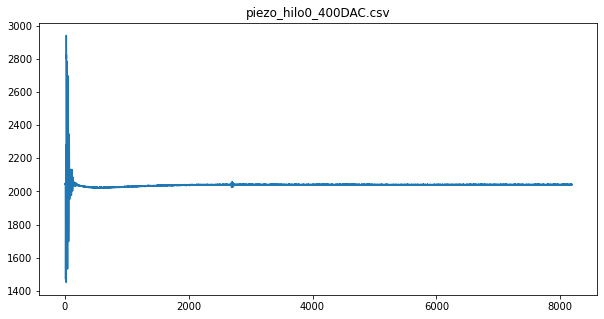

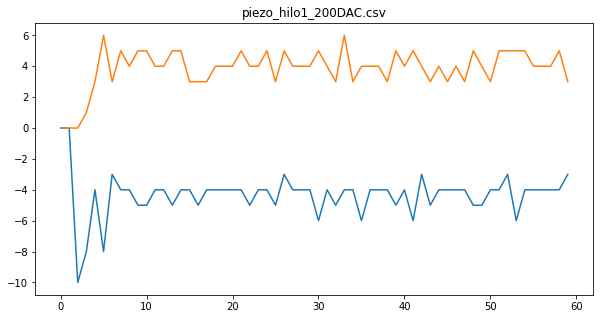

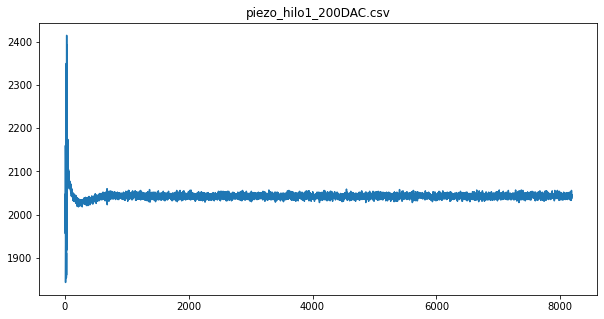

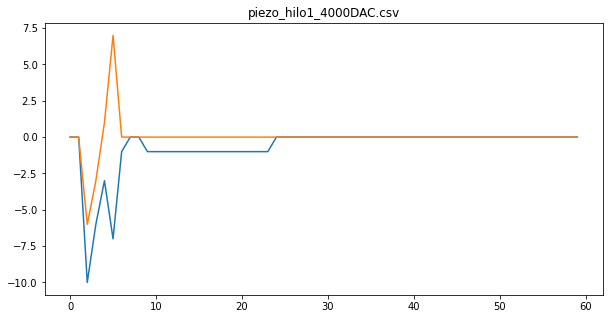

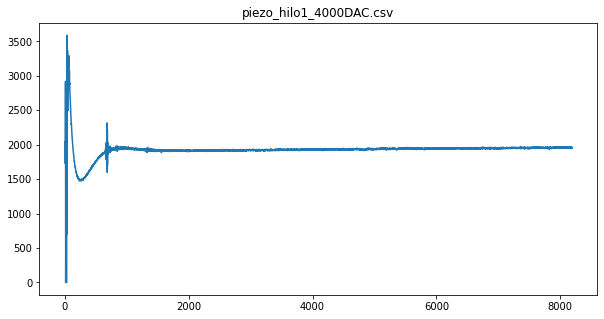

In [25]:
for file in os.listdir("./"):
    if file.endswith(".csv"):
        filename = (os.path.join("./", file))

        HILO = int(filename.split("hilo")[-1][0])
        GAIN = int(filename.split("_")[-1].split("DAC")[0])       
        print(filename,HILO,GAIN)
        signal = np.genfromtxt(filename, delimiter=',')
        sig_print(signal,60,20,HILO,GAIN,filename.split("/")[-1])